In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os

# Add the PowerFactory Python API to the path # TODO: Update this path to match your PowerFactory installation
sys.path.append("C:\\Program Files\\DIgSILENT\\PowerFactory 2024\\Python\\3.12")

# Add the src directory to Python path for development
sys.path.append(os.path.join(os.getcwd(), "..")) 

import powerfactory as pf
from src.pfapi.core.Network import Network  
import src.pfapi.utils.ImportModels as ImportModels
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Initialize PowerFactory application and import 39-bus system model for this example
print("Initializing PowerFactory application...")
app: pf.Application = pf.GetApplicationExt()
app.Show()

# Select the example network
# File path: "grid_models\\Radial System.pfd"                IntPrj name: "Radial System" 
# File path: "grid_models\\Meshed Network.pfd"               IntPrj name: "Meshed Network"
# File path: "grid_models\\Simple Mesh 5-bus.pfd"            IntPrj name: "Simple Mesh 5-bus"
# File path: "grid_models\\39 Bus New England System.pfd"    IntPrj name: "39 Bus New England System"
pfd_file_project = "grid_models\\Radial System.pfd" # File path to the PFD file
pfd_project_name = "Radial System" # IntPrj name
project = ImportModels.import_pfd_file(app, pfd_file_project, pfd_project_name)

Initializing PowerFactory application...


In [2]:
# Initialize the Network object (reads topology and connected components)
try:
    app.Hide()  # Hide the PowerFactory GUI for cleaner output
    network = Network(app, base_mva=100.0)
except Exception as e:
    print("Failed to initialize the network. Ensure that the PowerFactory model is loaded correctly.")
    print(e)
    app.Show()  # Show the GUI again if initialization fails
app.Show()

INFO: Processed 22 valid busbars
INFO: Running load flow analysis to obtain busbar results...
INFO: Reading network elements from PowerFactory...
INFO: Successfully read 63 classified elements from PF
INFO: Classified element counts:
INFO:   ElmLne: 20
INFO:   ElmLod: 21
INFO:   ElmSym: 21
INFO:   ElmCoup: 1


In [3]:
# Obtain network admittance matrix
from src.pfapi.utils.AdmittanceMatrix import build_admittance_matrix
import pandas as pd
Y_bus = build_admittance_matrix(network, as_dataframe=True)
Y_bus.head(10) if isinstance(Y_bus, pd.DataFrame) else None


,Bus 1,Bus 2,Bus 11,Bus X,Bus 3,Bus 4,Bus 5,Bus 7,Bus 8,Bus 9,...,Bus 14,Bus 15,Bus 17,Bus 16,Bus 13,Bus 6,Bus 20,Bus 18,Bus 19,Bus 21
Bus 1,0.80000-20.33384j,-0.00000+10.00000j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
Bus 2,-0.00000+10.00000j,0.80000-30.06768j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,-0.00000+10.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
Bus 11,0.00000+ 0.00000j,0.00000+ 0.00000j,2.560000e+12-2.006768e+ 01j,-2.560000e+12+0.000000e+ 00j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
Bus X,0.00000+ 0.00000j,0.00000+ 0.00000j,-2.560000e+12+0.000000e+ 00j,2.560000e+12-1.000000e+ 01j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
Bus 3,0.00000+ 0.00000j,-0.00000+10.00000j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.80000-30.06768j,-0.00000+10.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
Bus 4,0.00000+ 0.00000j,0.00000+ 0.00000j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,-0.00000+10.00000j,0.80000-30.06768j,-0.00000+10.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
Bus 5,0.00000+ 0.00000j,0.00000+ 0.00000j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.00000+ 0.00000j,-0.00000+10.00000j,0.80000-30.06768j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-0.0+10.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
Bus 7,0.00000+ 0.00000j,0.00000+ 0.00000j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.80000-30.06768j,-0.00000+10.00000j,0.00000+ 0.00000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-0.0+10.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
Bus 8,0.00000+ 0.00000j,0.00000+ 0.00000j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,-0.00000+10.00000j,0.80000-30.06768j,-0.00000+10.00000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
Bus 9,0.00000+ 0.00000j,0.00000+ 0.00000j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,0.00000+ 0.00000j,-0.00000+10.00000j,0.80000-30.06768j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j


In [4]:
from src.pfapi.utils.AdmittanceMatrix import reduce_matrix
import numpy as np
import pandas as pd

# Reduce the admittance matrix to only generator buses
Y_bus = build_admittance_matrix(network, as_dataframe=False)
if not isinstance(Y_bus, np.ndarray):
    raise TypeError("Y_bus must be a numpy ndarray, but got type {}".format(type(Y_bus)))
reduced_Y_bus, generator_bus_names_order = reduce_matrix(Y_bus, network)
# pd.DataFrame(reduced_Y_bus, index=generator_bus_names_order, columns=generator_bus_names_order) # Only for printing the reduced matrix

In [5]:
from src.pfapi.core.synchro_power_coefficients import calculate_power_distribution_ratios

# Calculate synchronizing power coefficients
GEN_OUT = "SG 11" #! Update with grid change!

try:
    app.Hide()
    ratios = calculate_power_distribution_ratios(reduced_Y_bus, generator_bus_names_order, network, GEN_OUT)
except Exception as e:
    print(f"Failed to calculate synchronizing power coefficients for outage of generator {GEN_OUT}.")
    print(e)
    app.Show()
app.Show()
# # Display the synchronizing power coefficients
# print(f"Synchronizing power coefficients for outage of generator {GEN_OUT}:")
# print(ratios)

INFO: Calculating synchronizing power coefficients for disturbance bus: Bus X at index 2


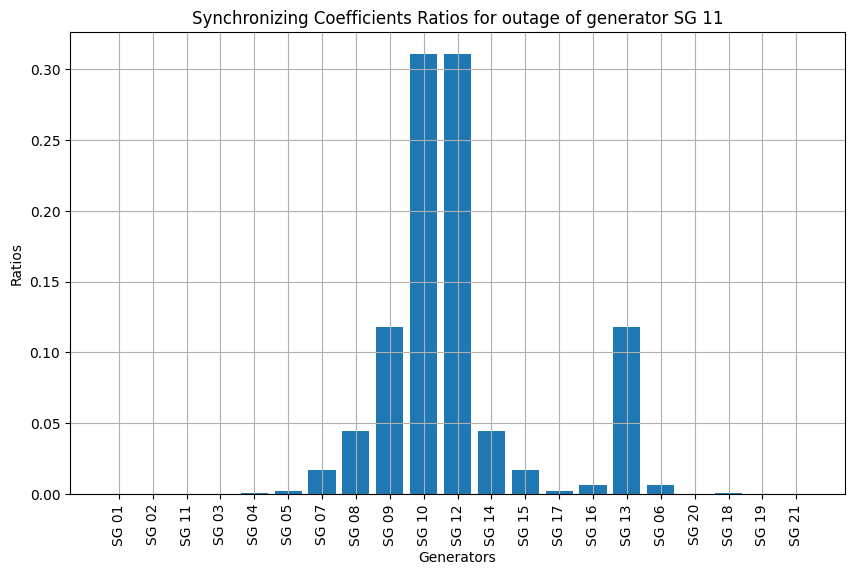

In [6]:
# Convert generator_bus_names to generator_names order
generator_names_order = [network.get_generator_name_from_busbar(bus) for bus in generator_bus_names_order]

# Plot the ratios
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(generator_names_order, ratios)
plt.xlabel('Generators')
plt.ylabel('Ratios')
plt.title('Synchronizing Coefficients Ratios for outage of generator {}'.format(GEN_OUT))
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [7]:
from helpers.obtain_rms_results import obtain_rms_results
project = app.GetActiveProject()
project.Deactivate()
project.Activate()
results_folder_path = r"./rms_results" # Relative path
results_file_path = f"{results_folder_path}/{pfd_project_name.replace(' ', '_')}"
app.Hide()
# Run RMS simulation for the outage of generator GEN_OUT
rms_results = obtain_rms_results(app, results_file_path)
app.Show()

Ime Rezultatov:  All calculations
All generators:  21
Generators:  21
Generators:  ['SG 01', 'SG 02', 'SG 11', 'SG 03', 'SG 04', 'SG 05', 'SG 07', 'SG 08', 'SG 09', 'SG 10', 'SG 12', 'SG 06', 'SG 13', 'SG 14', 'SG 15', 'SG 16', 'SG 17', 'SG 18', 'SG 19', 'SG 20', 'SG 21']
Processing generator outage for generator nr. 1: SG 01
Processing generator outage for generator nr. 2: SG 02
Processing generator outage for generator nr. 3: SG 11
Processing generator outage for generator nr. 4: SG 03
Processing generator outage for generator nr. 5: SG 04
Processing generator outage for generator nr. 6: SG 05
Processing generator outage for generator nr. 7: SG 07
Processing generator outage for generator nr. 8: SG 08
Processing generator outage for generator nr. 9: SG 09
Processing generator outage for generator nr. 10: SG 10
Processing generator outage for generator nr. 11: SG 12
Processing generator outage for generator nr. 12: SG 06
Processing generator outage for generator nr. 13: SG 13
Processi

In [8]:
from helpers.get_simulation_data import get_simulation_data
import matplotlib.pyplot as plt

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Get the simulation data
rdP, simulation_gen_order, data = get_simulation_data(GEN_OUT, f"./rms_results/{pfd_project_name.replace(' ', '_')}/results_izpad_{GEN_OUT}.csv")
# print(rdP)


[6.19177450e-03 1.25868066e-02 0.00000000e+00 3.24714928e-02
 8.65909153e-02 2.31686727e-01 1.65369427e+00 4.40888014e+00
 1.17382651e+01 3.12102293e+01 3.12102293e+01 6.19403449e-01
 1.17382651e+01 4.40888014e+00 1.65369429e+00 6.19403449e-01
 2.31686727e-01 8.65909153e-02 3.24714928e-02 1.25868066e-02
 6.19177450e-03]


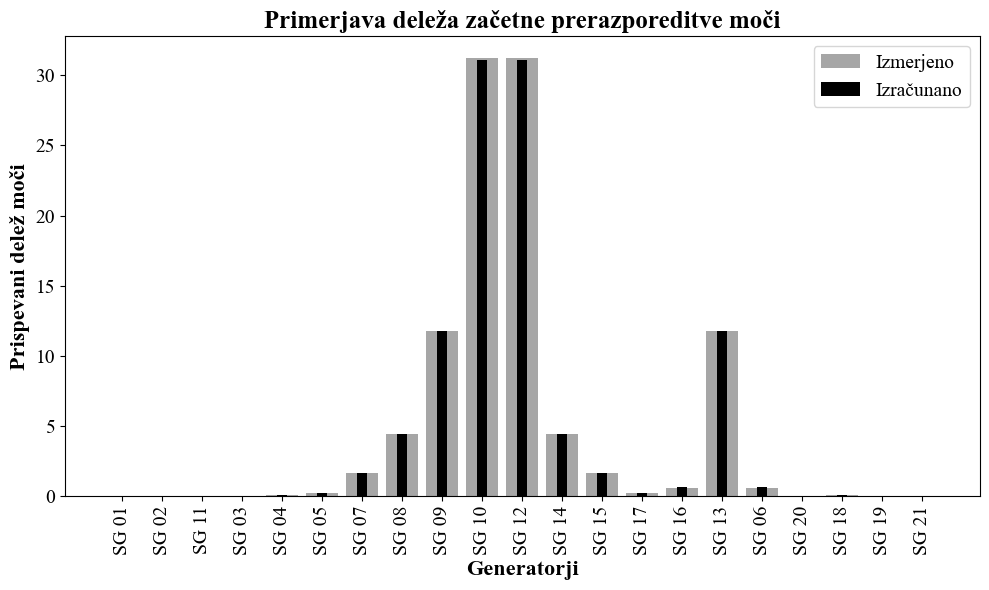

In [9]:
# Plot the synched_simulation_data values
import matplotlib.pyplot as plt

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['svg.fonttype'] = 'none'  # Embed fonts as text, not paths
print(rdP)

# Reorder rdP to match gen_order
rdP_reordered = []
for gen in generator_names_order:
    # Find the index of this generator in simulation_gen_order
    sim_index = simulation_gen_order.index(gen)
    # Add the corresponding rdP value
    rdP_reordered.append(rdP[sim_index])

# Convert back to numpy array if needed
rdP_reordered = np.array(rdP_reordered)

plt.figure(figsize=(10, 6))
bar2 = plt.bar(generator_names_order, rdP_reordered, 0.8, color='gray', label='Izmerjeno', alpha=0.7)
bar1 = plt.bar(generator_names_order, [r * 100 for r in ratios], 0.25, color='black', label='Izračunano', alpha=1)
plt.xlabel('Generatorji', fontsize=16, fontweight='bold')
plt.ylabel('Prispevani delež moči', fontsize=16, fontweight='bold')
plt.title('Primerjava deleža začetne prerazporeditve moči', fontsize=18, fontweight='bold')
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.legend(fontsize=14)
plt.tight_layout()

# # Save as SVG with high quality settings
# plt.savefig('power_contribution_comparison.svg', format='svg', bbox_inches='tight', 
#            facecolor='white', edgecolor='none', transparent=False)

plt.show()